In [1]:
# import os
# os.cpu_count()
!nvidia-smi

Wed Nov 30 12:47:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import Libraries
import numpy as np
import tensorflow as tf

# import tensorflow layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout

In [3]:
# Load Datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape) # 4차원 Tensor
## 32 x 32 x 3(RGB-channel) -> 이미지당 pixel 개수.
print(X_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


### Preprocessing

Input Normalization

In [4]:
# min-max scaling
# RGB, 3-channel color [0, 255] 24bit True color(RGB); 32bit(CYMK)
X_train = X_train / 255.
X_test = X_test / 255.
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

### Training with Vanilla CNN

**Model Architecture**

> Conv - Relu - Conv - Relu - FC - FC


In [5]:
# Sequential 객체를 이용하여 layer를 쌓아올려 모델을 만듭니다.
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(filters=6,
           kernel_size=5,
           strides=2,
           padding='same',
           activation='relu'),
    Conv2D(filters=16,
           kernel_size=5,
           strides=2,
           padding='same',
           activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 6)         456       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 dropout (Dropout)           (None, 8, 8, 16)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 16)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1024)              263168    
                                                        

In [6]:
# training setup
from tensorflow.keras.optimizers import SGD, Adam

## config variables
batch_size = 128
lr = 1e-4
epochs = 50

# Set optimizer, loss function, metrics, callback function
optimizer = Adam(learning_rate=lr)

# categorical_crossentropy : target value가 이미 one-hot vector인 경우
# sparse_categorical_crossentropy : 그냥 정수

loss_fn = 'sparse_categorical_crossentropy' # multi-class classification
metrics = ['accuracy']

model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=metrics)

In [7]:
# model training

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test), # 매 epoch마다 validation 성능 체크 가능!
                    verbose=1)

Epoch 1/50
391/391 [==============================] - 10s 6ms/step - loss: 1.9273 - accuracy: 0.3126 - val_loss: 1.7445 - val_accuracy: 0.3920
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 1.6694 - accuracy: 0.4083 - val_loss: 1.6192 - val_accuracy: 0.4298
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 1.5714 - accuracy: 0.4399 - val_loss: 1.5321 - val_accuracy: 0.4593
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 1.5097 - accuracy: 0.4628 - val_loss: 1.4915 - val_accuracy: 0.4762
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 1.4675 - accuracy: 0.4758 - val_loss: 1.4400 - val_accuracy: 0.4937
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 1.4335 - accuracy: 0.4909 - val_loss: 1.4244 - val_accuracy: 0.4971
Epoch 7/50
391/391 [==============================] - 3s 6ms/step - loss: 1.4043 - accuracy: 0.4999 - val_loss: 1.4096 - val_accuracy: 0.5030
Epoch

In [ ]:
# evaluate
loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print("Loss : %.4f, Accuracy : %.4f" % (loss, acc))

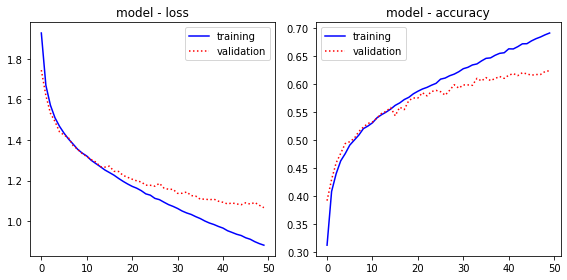

In [8]:
## loss visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'],'b-', label = "training")
plt.plot(history.history['val_loss'], 'r:', label = "validation")
plt.title("model - loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("model - accuracy")

plt.plot(history.history['accuracy'], 'b-', label = "training")
plt.plot(history.history['val_accuracy'], 'r:', label = "validation")

plt.legend()
plt.tight_layout()
plt.show()